# Linear Regression Analysis of AmesHousing Dataset

The purpose of this study is to be able to interpret and evaluate the models that you build. In this assignment, I will fit, interpret, and evaluate regression models using standard functions and diagnostic techniques, interpret the results and implement diagnostic techniques to identify and correct issues with the model, such as issues with overfitting, linearity, multicollinearity and outliers. Eventually I will select best model from multiple predictors using automated techniques. For this assignment I will be using dataset that contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.

## Opening the file and reviewing general information about the dataset

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

### Reading Data

In [2]:
data = pd.read_csv('/Users/olgatiatina/Desktop/AmesHousing.csv')
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


### Examining general information about the dataframe

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

The dataframe consists of 82 columns and 2930 rows. There are 28 columns with integer data type, 11 columns with float data type, and 43 columns with object data type.

### Examining numerical columns

In [4]:
# examining numerical columns
numerical_data = data.select_dtypes("number")
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Overall Qual     2930 non-null   int64  
 6   Overall Cond     2930 non-null   int64  
 7   Year Built       2930 non-null   int64  
 8   Year Remod/Add   2930 non-null   int64  
 9   Mas Vnr Area     2907 non-null   float64
 10  BsmtFin SF 1     2929 non-null   float64
 11  BsmtFin SF 2     2929 non-null   float64
 12  Bsmt Unf SF      2929 non-null   float64
 13  Total Bsmt SF    2929 non-null   float64
 14  1st Flr SF       2930 non-null   int64  
 15  2nd Flr SF       2930 non-null   int64  
 16  Low Qual Fin SF  2930 non-null   int64  
 17  Gr Liv Area   

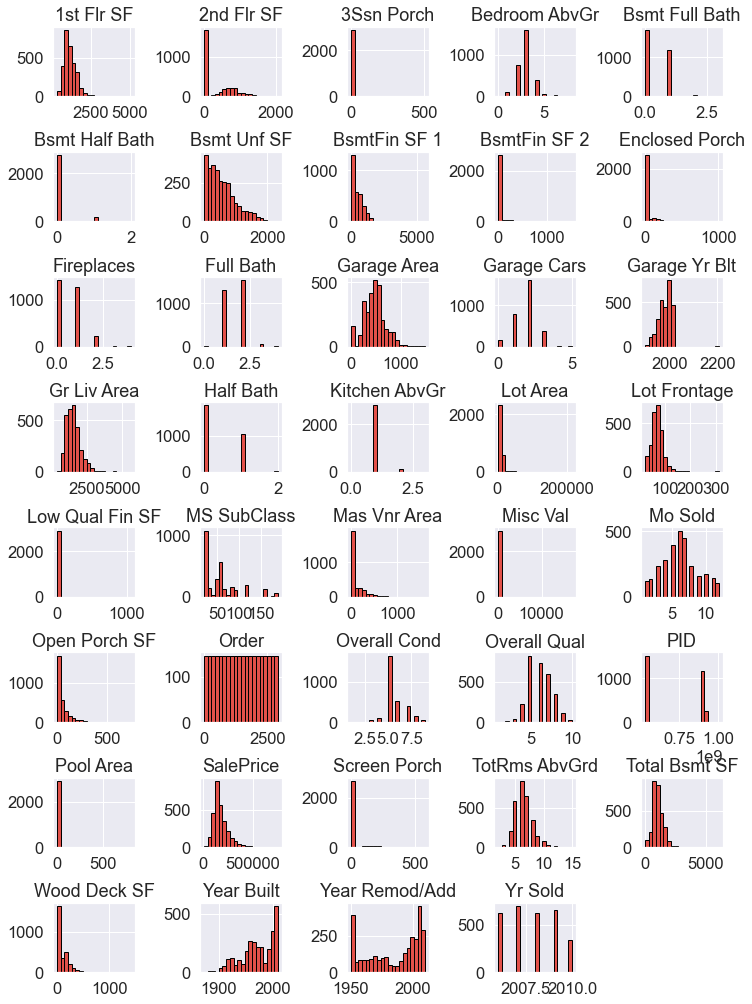

In [5]:
# creating histograms of all numerical columns
numerical_data.hist(
    bins=20, figsize=(12, 22), edgecolor="black", layout=(10, 5)
)
plt.subplots_adjust(hspace=0.8, wspace=0.8)

This dataframe consists of 39 numerical columns with 11 of them being float numbers and 28 of them - integers. We also build histograms for all numerical columns to visualize the distribution of values and gain insights into the data's central tendency, spread, and potential patterns or outliers.

### Examining categorical columns

In [6]:
# examining categorical columns
string_data = data.select_dtypes(object)
string_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS Zoning       2930 non-null   object
 1   Street          2930 non-null   object
 2   Alley           198 non-null    object
 3   Lot Shape       2930 non-null   object
 4   Land Contour    2930 non-null   object
 5   Utilities       2930 non-null   object
 6   Lot Config      2930 non-null   object
 7   Land Slope      2930 non-null   object
 8   Neighborhood    2930 non-null   object
 9   Condition 1     2930 non-null   object
 10  Condition 2     2930 non-null   object
 11  Bldg Type       2930 non-null   object
 12  House Style     2930 non-null   object
 13  Roof Style      2930 non-null   object
 14  Roof Matl       2930 non-null   object
 15  Exterior 1st    2930 non-null   object
 16  Exterior 2nd    2930 non-null   object
 17  Mas Vnr Type    2907 non-null   object
 18  Exter Qu

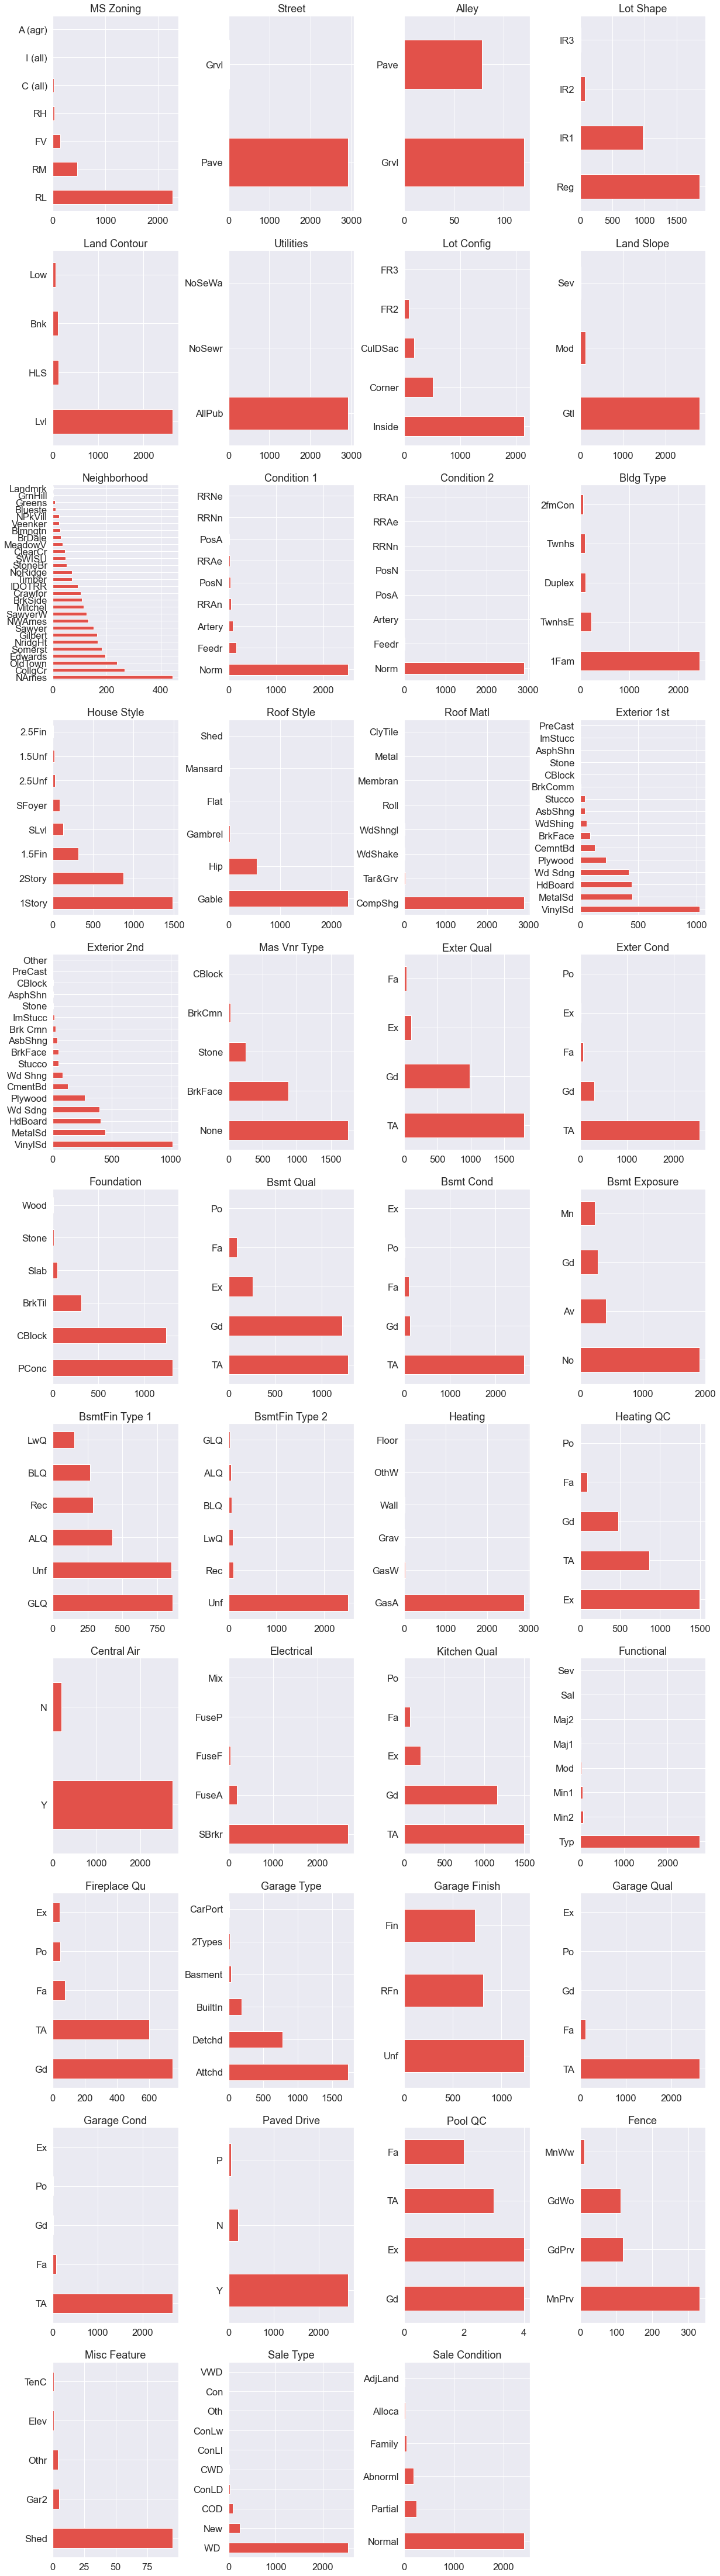

In [7]:
# creating horizontral barplots for categorical columns 
from math import ceil
from itertools import zip_longest

n_string_features = string_data.shape[1]
nrows, ncols = ceil(n_string_features / 4), 4

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 80))

for feature_name, ax in zip_longest(string_data, axs.ravel()):
    if feature_name is None:
        # do not show the axis
        ax.axis("off")
        continue

    string_data[feature_name].value_counts().plot.barh(ax=ax)
    ax.set_title(feature_name)

plt.subplots_adjust(hspace=0.2, wspace=0.4)

This dataframe consists of 43 categorical columns. Using the value_counts() function, we created horizontal bar plots for all categorical columns to visually explore the frequency distribution of each category, identify dominant categories, and observe patterns within the categorical variables.

### Checking for Nulls

In [8]:
# setting the maximum number of rows and columns to display to none
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# checking for nulls
data.isna().sum()

Order                 0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        490
Lot Area              0
Street                0
Alley              2732
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         23
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            80
Bsmt Cond            80
Bsmt Exposure        83
BsmtFin Type 1       80
BsmtFin SF 1          1
BsmtFin Type 2       81
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [9]:
# Setting the maximum number of rows and columns to display back to 10
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

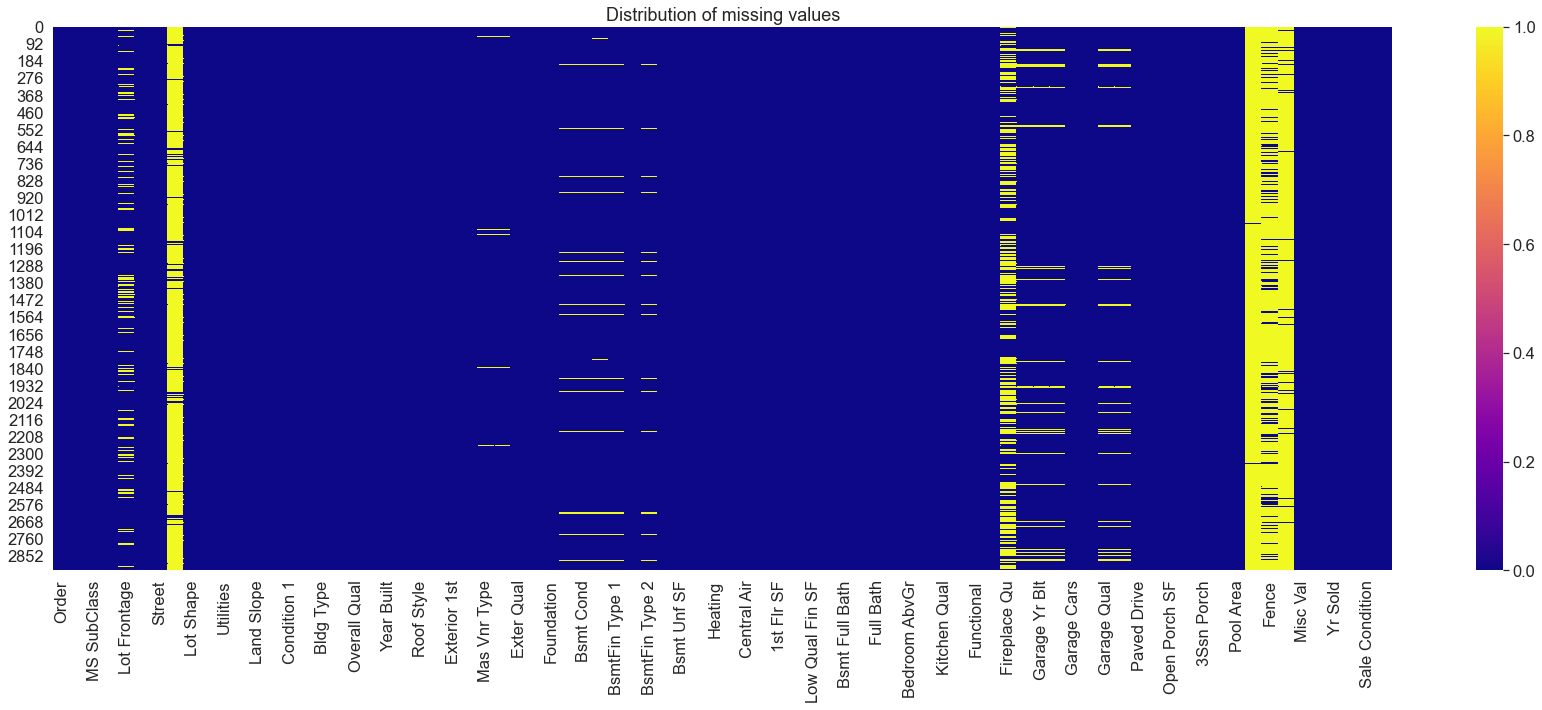

In [10]:
# creating a heatmap to visualise the distribution of missing values
plt.figure(figsize= (30,10))
sns.heatmap(data.isnull(), cmap = 'plasma')
plt.title('Distribution of missing values') 
plt.show()

As you can see from the heatmap above, there are a lot of missing values in both categorical and numerical columns.

### Filling nulls with data

In [11]:
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

numerical_features = [
    "Lot Frontage", "Mas Vnr Area", "BsmtFin SF 1", "BsmtFin SF 2", "Bsmt Unf SF",
    "Total Bsmt SF", "Bsmt Full Bath", "Bsmt Half Bath", "Garage Yr Blt", "Garage Cars", "Garage Area"
]

categorical_features = data.columns.difference(numerical_features)

most_frequent_imputer = SimpleImputer(strategy="most_frequent")
mean_imputer = SimpleImputer(strategy="mean")

# filling nulls with most frequent values for categorical data types and mean values for numerical data types
preprocessor = make_column_transformer(
    (most_frequent_imputer, categorical_features),
    (mean_imputer, numerical_features),
)

clean_data = pd.DataFrame(
    preprocessor.fit_transform(data),
    columns=categorical_features.tolist() + numerical_features,
)
clean_data = clean_data[data.columns]
clean_data = clean_data.astype(
    data.dtypes
)
clean_data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.00000,...,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.00000,...,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.00000,...,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.00000,...,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.00000,...,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.00000,...,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,69.22459,...,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.00000,...,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.00000,...,4,2006,WD,Normal,170000


In [12]:
clean_data.isna().sum()

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64

In order to clean our data, we decided to fill the nulls with most frequent values for categorical columns and mean values for numerical columns.

### Finding data statistics

In [13]:
clean_data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,...,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,...,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,21.321523,7880.017759,...,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,...,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,60.000000,7440.250000,...,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,69.224590,9436.500000,...,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,78.000000,11555.250000,...,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,...,800.000000,17000.000000,12.000000,2010.000000,755000.000000


We used the describe() function to generate summary statistics for each numerical column in the dataframe. This allowed us to obtain key statistical measures such as the mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum. These statistics provide a comprehensive overview of the central tendency, spread, and distribution of the numerical data, aiding in the initial exploration and understanding of the dataset.

### Creating a correlation matrix of the numeric values

In [14]:
# setting the maximum number of rows and columns to display to none
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# using the cor() function to produce a correlation matrix of the numeric values
correlation_matrix = clean_data.corr()
correlation_matrix

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.006461,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030818,-0.032321,-0.002773,0.005780,-0.028719,-0.013201,-0.000417,0.013589,-0.009342,-0.042539,0.024978,-0.044985,-0.039749,0.015424,-0.017685,0.002612,-0.019156,-0.049662,-0.036180,-0.035430,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.088419,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.228392,-0.098358,-0.001145,-0.087692,-0.189609,-0.141902,-0.003289,0.056940,-0.107579,-0.037746,0.004327,-0.171431,-0.166636,0.006345,0.076470,-0.068981,-0.108056,-0.249376,-0.237440,-0.210567,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.392019,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002724,-0.060067,-0.070937,-0.130404,-0.219416,-0.247828,0.304237,0.025765,0.068061,0.013698,-0.003328,0.134631,0.175879,-0.019208,0.257698,0.031898,-0.049955,0.083661,-0.045882,-0.103237,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.006461,-0.088419,-0.392019,1.000000,0.365503,0.198900,-0.067383,0.115688,0.085744,0.203383,0.199946,0.040161,0.107733,0.329620,0.423170,0.026208,0.005009,0.350728,0.098979,-0.022207,0.166997,0.037738,0.217821,0.005041,0.324109,0.229918,0.070046,0.290218,0.337700,0.104632,0.150426,0.011685,0.025501,0.070084,0.160698,0.035926,0.010177,-0.006921,0.340751
Lot Area,0.031354,0.034868,-0.204613,0.365503,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126586,0.191546,0.083145,0.023657,0.253576,0.332235,0.032996,0.000812,0.285599,0.125400,0.026801,0.127433,0.035497,0.136569,-0.020301,0.216597,0.256989,-0.008886,0.179512,0.212821,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.198900,0.097188,1.000000,-0.094812,0.597027,0.569609,0.427470,0.284011,-0.041272,0.269956,0.547088,0.477837,0.241402,-0.048680,0.570556,0.167778,-0.041627,0.522263,0.268853,0.063291,-0.159744,0.380693,0.393007,0.543079,0.599483,0.563445,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.067383,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135088,-0.050920,0.041122,-0.136780,-0.173295,-0.157052,0.006218,0.009175,-0.115643,-0.042742,0.084407,-0.214316,-0.088127,-0.006137,-0.086386,-0.089816,-0.031702,-0.304964,-0.181552,-0.153750,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.115688,0.023258,0.597027,-0.368773,1.000000,0.612095,0.311828,0.279836,-0.027412,0.128983,0.407477,0.310463,0.016828,-0.144282,0.241726,0.211818,-0.030622,0.469406,0.269268,-0.055093,-0.137852,0.111919,0.170672,0.790039,0.537209,0.479922,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.085744,0.021682,0.569609,0.047680,0.612095,1.000000,0.196170,0.151720,-0.062100,0.164729,0.297344,0.242108,0.158939,-0.060365,0.316855,0.134318,-0.046268,0.457266,0.211771,-0.021536,-0.142404,0.197528,0.133322,0.627229,0.425367,0.376406,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030818,-0.228392,0.002724,0.203383,0.126586,0.427470,-0.135088,0.311828,0.196170,1.000000,0.300396,-0.016007,0.091210,0

Using the corr() function, we created the correlation matrix of the numeric values. This matrix provides a pairwise correlation coefficient between each pair of numerical columns, allowing us to examine the strength and direction of linear relationships between variables. Analyzing the correlation matrix aids in identifying potential multicollinearity, understanding feature relationships, and guiding further investigation into patterns within the dataset.

### Producing a correlation matrix plot

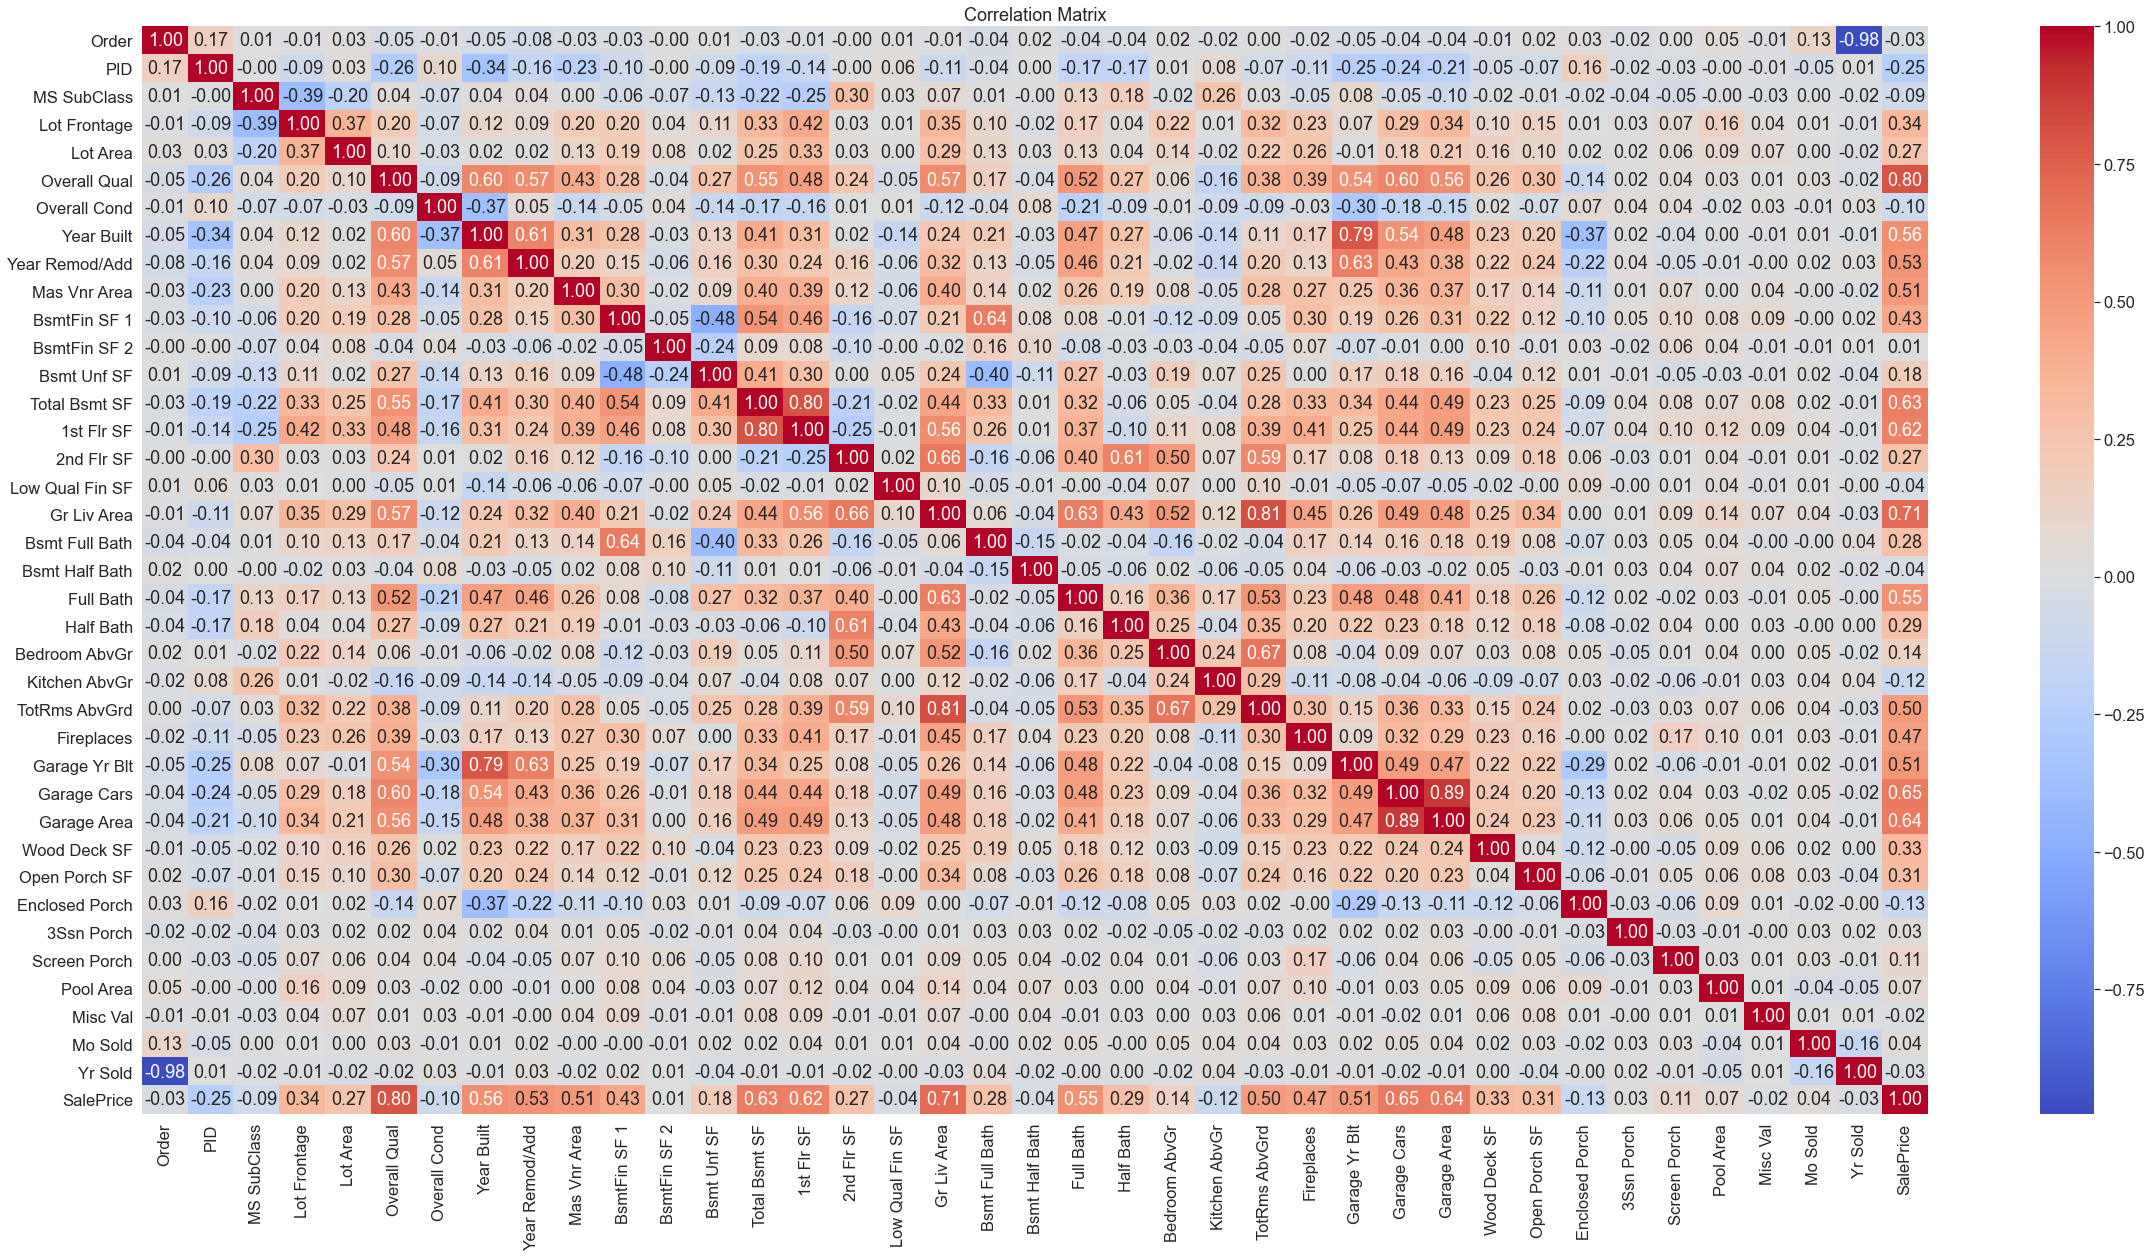

In [15]:
# producing a correlation matrix plot
plt.figure(figsize= (40,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

As you can see from the plot above, the highest correlation saleprice has with overall quality (0.8), ground living area (0.71), garage cars (0.65), garage area (0.64), total square feet of basement area (0.63), total square feet of first floor area (0.62), overall conditions (0.56), full bathrooms above grade (0.55), garage year built (0.53), year remodeled (0.53), masonry veneer area (0.51) and total rooms above grade (0.50).

### Creating scatter plots

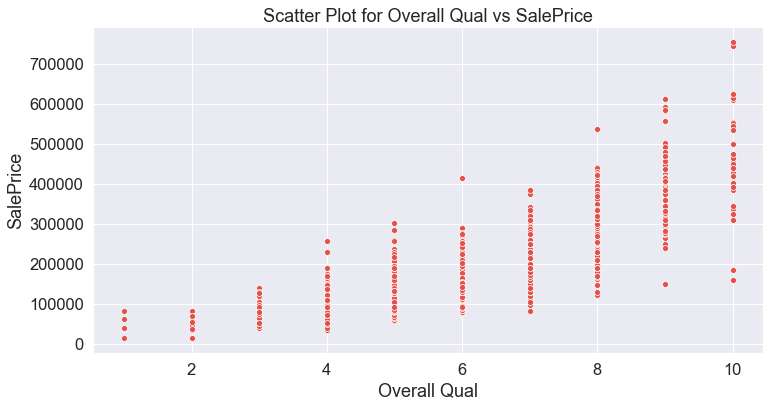

In [16]:
# highest correlation with SalePrice
highest_corr_variable = 'Overall Qual'

# Scatter plot for the variable with the highest correlation
plt.figure(figsize=(12, 6))
sns.scatterplot(x=highest_corr_variable, y='SalePrice', data=clean_data)
plt.title(f'Scatter Plot for {highest_corr_variable} vs SalePrice')
plt.show()

Out of all the variables, the overall quality demonstrates the strongest positive correlation with the sale price, as indicated by the correlation coefficient of 0.8 in the correlation matrix. This positive relationship is clearly evident in the scatter plot depicted above, where it is observable that the sale price increases correspondingly with the overall quality.

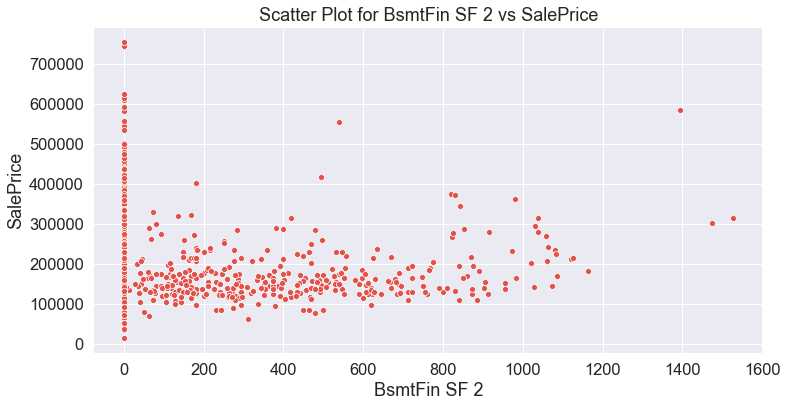

In [17]:
# lowest correlation with SalePrice
lowest_corr_variable = 'BsmtFin SF 2'

# scatter plot for the variable with the lowest correlation
plt.figure(figsize=(12, 6))
sns.scatterplot(x=lowest_corr_variable, y='SalePrice', data=clean_data)
plt.title(f'Scatter Plot for {lowest_corr_variable} vs SalePrice')
plt.show()

Among all the variables, the square footage of the type 2 finished basement exhibits the lowest correlation with the sale price, as evidenced by a correlation coefficient of 0.01 in the correlation matrix. This observation aligns with the scatter plot, where it is apparent that the points are dispersed across the graph without demonstrating a discernible pattern in relation to the increase in square footage of the type 2 finished basement.

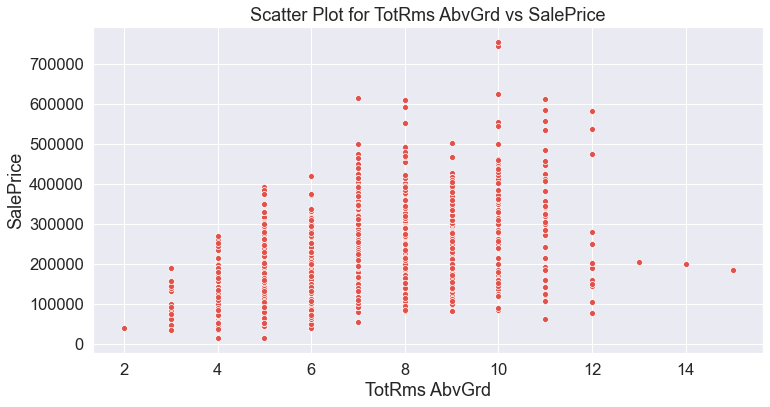

In [18]:
# Variable with correlation closest to 0.5
closest_corr_variable = 'TotRms AbvGrd'

# Scatter plot for the variable with correlation closest to 0.5
plt.figure(figsize=(12, 6))
sns.scatterplot(x=closest_corr_variable, y='SalePrice', data=clean_data)
plt.title(f'Scatter Plot for {closest_corr_variable} vs SalePrice')
plt.show()

The total rooms above grade show the closest correlation to 0.5, evident from the correlation coefficient of 0.5 in the correlation matrix. This observation is also apparent in the scatter plot above, where it can be observed that the sale price tends to increase with the total rooms above grade; however, the relationship is not as pronounced as in the case of overall quality, where the correlation coefficient is 0.8.

### Assumptions for Linear Regressions

### <a id="linearity">1. Linearity</a>

#### Linear regression needs the relationship between the independent and dependent variables to be linear.  Let's use a pair plot to check the relation of independent variables with the SalePrice variable

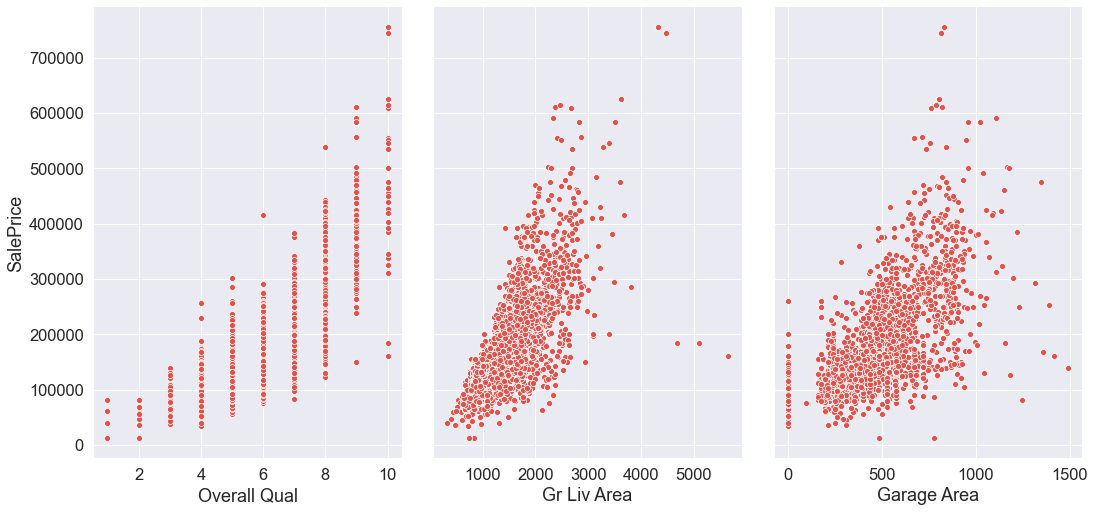

In [19]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(clean_data, x_vars=['Overall Qual','Gr Liv Area','Garage Area'], y_vars='SalePrice', size=7, 
                 aspect=0.7)

By looking at the plots above we can see that all of independent variables have a strong correlation with the SalePrice. However, none of them form an accurately linear shape, which mean a linear model might not be able to *efficiently* explain the data in terms of variability, prediction and accuracy.

### Using at least 3 continuous variables, fit a regression model in R.

In [20]:
selected_columns = ['Overall Qual','Gr Liv Area','Garage Area']
x = clean_data[selected_columns]
y = clean_data.SalePrice

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
model_reg = regr.fit(X_train,y_train)

I used the 3 highest correlated variables with SalePrice to fit a regression model. The chosen variables, namely 'Overall Qual,' 'Gr Liv Area,' and 'Garage Area,' were selected based on their strong correlation with SalePrice, aiming to capture influential factors in predicting the target variable. The regression model leverages these variables to establish a predictive relationship, allowing for the estimation of SalePrice based on the observed values of the selected features.

### <a id="mean">2. Mean of Residuals</a>

#### Finding R^2 and Mean Residuals for Both Training and Test Data

#### Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out.

In [21]:
y_pred_test = regr.predict(X_test)

print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_test)))

R squared: 0.7491976887138705


In our case, R squared is approximately 0.75, which means that about 75% of the variance in the test data is explained by the model.

In [22]:
residuals_test = y_test.values-y_pred_test
mean_residuals_test = np.mean(residuals_test)
print("Mean of Residuals for test {}".format(mean_residuals_test))

Mean of Residuals for test -1739.659771471846


The mean of residuals for the test data is approximately -1739.66. Since the mean of residuals is not close to zero, it suggests that there might be a systematic bias in the predictions. The model tends to underpredict values on average.

In [23]:
y_pred_train = regr.predict(X_train)

print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred_train)))

R squared: 0.7609250622769954


In our case, R squared is approximately 0.76, which means that about 76% of the variance in the train data is explained by the model.

In [24]:
residuals_train = y_train.values-y_pred_train
mean_residuals_train = np.mean(residuals_train)
print("Mean of Residuals for train {}".format(mean_residuals_train))

Mean of Residuals for train 4.821936407032803e-12


The mean of residuals for the training data is close to zero (approximately 4.82*10^-12). Having a mean residual close to zero for the training data aligns with the assumption that the mean of residuals should be zero for a well-fitted model.

In [25]:
# now let's create a function that creates predictions on the features with the model and calculates residuals
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

In [26]:
# now we are creating a linear assumption function that is designed to check the linearity assumption
#  of a linear regression model
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')

    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')

    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


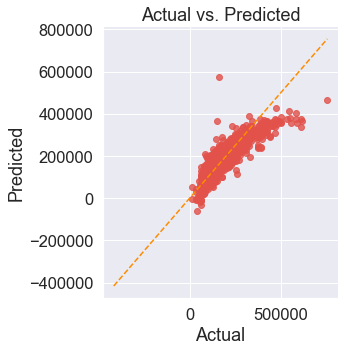

In [27]:
linear_assumption(regr, X_train, y_train)

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


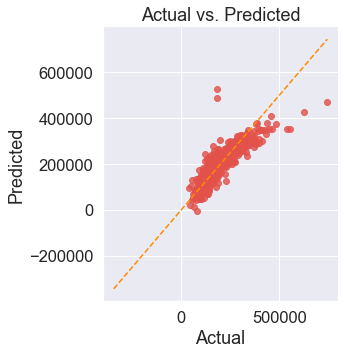

In [28]:
linear_assumption(regr, X_test, y_test)

As you can see on the scatter plots above, most points closely follow the diagonal line but there are a few points far away from it, which suggests that the majority of the predictions are in line with the linearity assumption, but there are some instances where the model's predictions deviate significantly from the actual values.

### <a id="mean">3. Normality</a>
#### Next we have to check the normality assumption, because it can cause problems while calculating confidence intervals. Skewness can be due to the presence of outliers and this can make bias while parameter estimation. The most powerful way of doing this by a Q-Q probability plot. The Quantile-Quantile is made by plotting the residuals vs the order of statistic.  A Normal Q-Q plot can be used to determine if the assumption of normality is met. The points should fall on the diagonal line. Points lying far from the diagonal line are unusual observations and warrant further investigation.

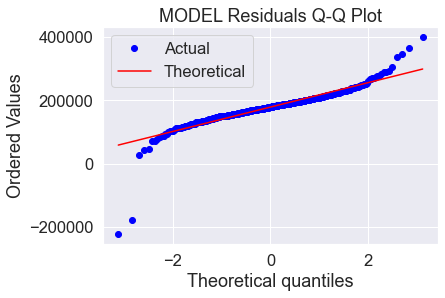

In [29]:
import statsmodels.api as sm
model_test = sm.OLS(y_test,X_test).fit()

#Import library
from scipy import stats
stats.probplot(model_test.resid, dist="norm", plot= plt)
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])
plt.show()

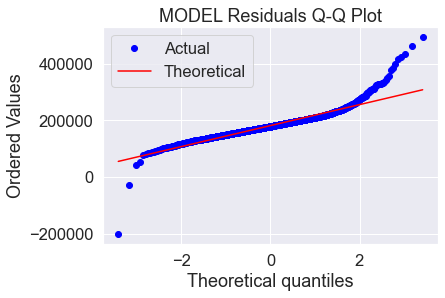

In [30]:
model_train = sm.OLS(y_train,X_train).fit()

#Import library
from scipy import stats
stats.probplot(model_train.resid, dist="norm", plot= plt)
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])
plt.show()

As you can see from the graphs above, most of the points closely follow the diagonal line, however, both of the graphs have points lying far from diagonal line, those are unusual observations that warrant further investigation.

### <a id="mean">4. Independence of Errors</a>

#### One of the assumptions of linear regression is that there is no correlation between the residuals. In other words, the residuals are assumed to be independent.

#### One way to determine if this assumption is met is to perform a Durbin-Watson test, which is used to detect the presence of autocorrelation in the residuals of a regression. This test uses the following hypotheses:

#### H0 (null hypothesis): There is no correlation among the residuals.

#### HA (alternative hypothesis): The residuals are autocorrelated.

#### The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, the test statistic will always be between 0 and 4 with the following interpretation:


*   A test statistic of 2 indicates no serial correlation.

*   The closer the test statistics is to 0, the more evidence of positive serial correlation.

*   The closer the test statistics is to 4, the more evidence of negative serial correlation.

#### As a rule of thumb, test statistic values between the range of 1.5 and 2.5 are considered normal. However, values outside of this range could indicate that autocorrelation is a problem.


1. For positive serial correlation, consider adding lags of the dependent and/or independent variable to the model.

2. For negative serial correlation, check to make sure that none of your variables are overdifferenced.

3. For seasonal correlation, consider adding seasonal dummy variables to the model.

In [31]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
print(durbin_watson(model_train.resid), ' ', durbin_watson(model_test.resid))

0.08875458347345748   0.10508149619013726


While performing Durbin-Watson test, test statistic values for both train and test data showed a value close to 0. meaning that is evidence of positive serial correlation between the values. In order to fix it, we will need to consider adding lags of the dependent and/or independent variable to the model.

In [32]:
print(model_test.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.145
Model:                            OLS   Adj. R-squared (uncentered):              0.142
Method:                 Least Squares   F-statistic:                              41.34
Date:                Mon, 22 Jan 2024   Prob (F-statistic):                    1.12e-24
Time:                        21:37:42   Log-Likelihood:                         -9924.5
No. Observations:                 733   AIC:                                  1.985e+04
Df Residuals:                     730   BIC:                                  1.987e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The model has statistical significance based on the F-statistic, but the R-squared is relatively low, indicating that the predictors might not explain a large proportion of the variance in the dependent variable, approximately only 14% can be explained by the model. The coefficients indicate the direction and magnitude of the relationship between each predictor and the dependent variable, while the p-values associated with the coefficients help assess their individual significance.

In [33]:
print(model_train.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.118
Model:                            OLS   Adj. R-squared (uncentered):              0.117
Method:                 Least Squares   F-statistic:                              97.97
Date:                Mon, 22 Jan 2024   Prob (F-statistic):                    1.65e-59
Time:                        21:37:42   Log-Likelihood:                         -29767.
No. Observations:                2197   AIC:                                  5.954e+04
Df Residuals:                    2194   BIC:                                  5.956e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The model has statistical significance based on the F-statistic, but the R-squared is relatively low, indicating that the predictors might not explain a large proportion of the variance in the dependent variable, approximately only 11% can be explained by the model. The coefficients indicate the direction and magnitude of the relationship between each predictor and the dependent variable, while the p-values associated with the coefficients help assess their individual significance.

### <a id="mean">4. Independence of Errors</a>

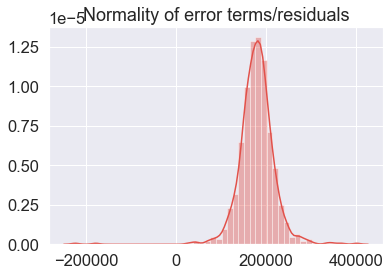

In [34]:
p = sns.distplot(model_test.resid,kde=True)
p = plt.title('Normality of error terms/residuals')

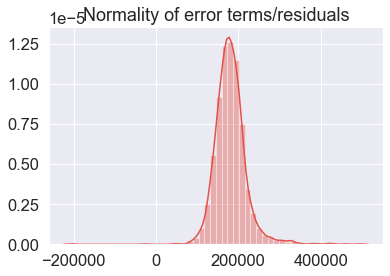

In [35]:
p = sns.distplot(model_train.resid,kde=True)
p = plt.title('Normality of error terms/residuals')

For both of the graphs, the histogram closely resembles a bell-shaped curve (normal distribution), it indicates that the residuals are approximately normally distributed.

### <a id="homo">5. Check for Homoscedasticity</a>

#### Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

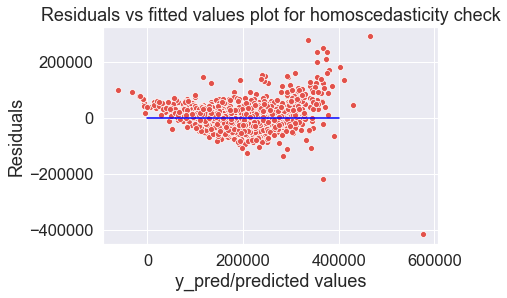

In [36]:
p = sns.scatterplot(x=y_pred_train,y=residuals_train)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot(x=[0,400000],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

As you can see from the graph above, majority of the residuals are consistently above the blue line and a minority are consistently below it, it suggests a potential pattern in the residuals. This pattern may indicate that the variance of residuals is not constant across all predicted values.

### <a id="homo">6. No Multicollinearity</a>
#### Multicollinearity occurs when the independent variables are correlated to each other. If the degree of multicollinearity is high it can cause problems while interpreting the results.

We can find the degree of correlation with the help of Variation Inflation Factor(VIF)

It can be interpreted as :

1= Not correlated

1-5 = Moderately correlated

\>5 = Highly correlated

Let's take a look at the results

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(clean_data[['Overall Qual','Gr Liv Area','Garage Area']].values, 
                                               i) for i in range(x.shape[1])]
vif["features"] = clean_data[['Overall Qual','Gr Liv Area','Garage Area']].columns
vif.round(2)

,VIF Factor,features
0,18.10,Overall Qual
1,15.06,Gr Liv Area
2,8.99,Garage Area


In our case, both "Overall Qual" and "Gr Liv Area" have VIF values well above 10, suggesting a substantial degree of correlation.A VIF of the "Garage Area" of 8.99 is relatively high, indicating notable multicollinearity for  variable. While not as extreme as the other two, it suggests some level of correlation with other predictors.Since all of the variables examine the substantion degree of correlation between the features, in order to take care of the multicollinearity issue, we will need either to remove some highly correlated variables, perform Principal Component Analysis for highly correlated variables or linearly add them together.

### Removing outliers

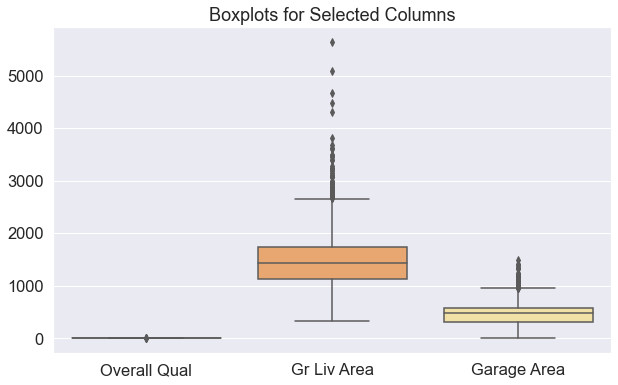

In [38]:
# removing outliers from indpendent variables
selected_columns = ['Overall Qual', 'Gr Liv Area', 'Garage Area']
subset_data = clean_data[selected_columns]

# Create boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_data)
plt.title('Boxplots for Selected Columns')
plt.show()

In [39]:
clean_data.shape[0]

2930

In [40]:
Q1 = clean_data[['Overall Qual', 'Gr Liv Area', 'Garage Area','SalePrice']].quantile(0.25)
Q3 = clean_data[['Overall Qual', 'Gr Liv Area', 'Garage Area','SalePrice']].quantile(0.75)
IQR = Q3 - Q1

clean_data = clean_data[~((clean_data[['Overall Qual', 'Gr Liv Area', 'Garage Area','SalePrice']] < (Q1 - 1.5 * IQR)
                          ) | (clean_data[['Overall Qual', 'Gr Liv Area', 'Garage Area','SalePrice']] > 
                             (Q3 + 1.5 * IQR))).any(axis=1)]

In [41]:
clean_data.shape[0]

2734

I removed outliers in 4 selected columns using the IQR (Interquartile Range) method, which removed about 6.7% of the data. While this outlier removal may enhance the robustness of statistical analyses and model performance by mitigating the influence of extreme values, it is crucial to acknowledge that the choice of outlier removal method and the percentage of data affected can introduce bias and influence the generalizability of the results.

### Attempt to correct any issues that you have discovered in your model. Did your changes improve the model, why or why not?

### Fixing multicollinearity issue

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


# Select the features with multicollinearity
selected_features = ['Overall Qual', 'Gr Liv Area', 'Garage Area']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clean_data[selected_features])

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_features)

# Check the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Select the number of components based on explained variance ratio
num_components = 3  # You may choose an appropriate number based on the explained variance

# Use the selected components in your regression model
selected_components = pca_result[:, :num_components]

# Assuming y is your target variable
model = LinearRegression()
model.fit(selected_components, clean_data['SalePrice'])

Explained Variance Ratio: [0.64712521 0.20036945 0.15250534]


LinearRegression()

The Explained Variance Ratios I obtained  (0.64712521, 0.20036945, 0.15250534) represent the proportion of variance in the original data that is explained by each principal component. In my case, I used PCA with 3 components, and the ratios indicate the amount of variability captured by each component. When I summed up these ratios, I got the cumulative explained variance that is equal to 1. This means that the three principal components collectively explain 100% of the variance in the original data. In my case, a cumulative explained variance of 100% is ideal, as it indicates that I retained all the variability in the data.

Mean Squared Error: 795558543.1970931
R-squared: 0.7611631774458509


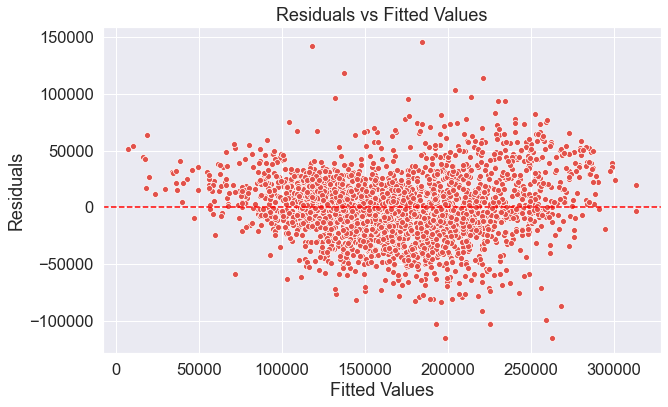

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_test is your test set and y_test is the corresponding target variable
X_test_scaled = scaler.transform(clean_data[selected_features])
X_test_pca = pca.transform(X_test_scaled)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(clean_data['SalePrice'], y_pred)
r2 = r2_score(clean_data['SalePrice'], y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot residuals
residuals = clean_data['SalePrice'] - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The R-squared value of 0.76 indicates that the model explains about 76% of the variance in the SalePrice based on the selected features. The MSE, while providing an absolute measure of prediction accuracy, should be interpreted relative to the scale of your target variable. Given the scale of SalePrice, an MSE of around 795 million is considered acceptable. This is because the errors (squared differences between predictions and actual values) are on the same scale as the variable I am predicting. Overall, my changes have improved the model because, based on the R-squared value, a larger proportion of the variability in the target variable is explained by the selected variables.

### Using the all subsets regression method to identify the "best" model.

In [44]:
import itertools
import statsmodels.api as sm
import pandas as pd

# Assuming 'clean_data' is your DataFrame with predictors and the response variable
predictors_subset = clean_data[['Overall Qual', 'Gr Liv Area', 'Garage Area']]
response = clean_data["SalePrice"]

# Create a list of all predictor combinations
all_predictor_combinations = []
for r in range(1, len(predictors_subset) + 1):
    all_predictor_combinations.extend(itertools.combinations(predictors_subset.columns, r))

# Initialize variables to store the best model information
best_model = None
best_aic = float('inf')  # Initialize with positive infinity

# Iterate through all predictor combinations
for predictors_combination in all_predictor_combinations:
    predictors_list = list(predictors_combination)
    X_subset = sm.add_constant(predictors_subset[predictors_list])
    model = sm.OLS(response, X_subset).fit()
    aic = model.aic
    
    # Check if the current model has a lower AIC
    if aic < best_aic:
        best_aic = aic
        best_model = model

# Print the summary of the best model
print(best_model.summary())

# Extract coefficients from the best model
best_coefficients = best_model.params
print("Best Model Coefficients:")
print(best_coefficients)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     2900.
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:37:44   Log-Likelihood:                -31895.
No. Observations:                2734   AIC:                         6.380e+04
Df Residuals:                    2730   BIC:                         6.382e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.588e+04   2680.113    -24.582   

In [45]:
# Make predictions using the best model
y_pred = best_model.predict(X_subset)

# Calculate residuals
residuals = response - y_pred

# Calculate MSE
mse = (residuals**2).mean()
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 795558543.197093


In summary, this regression model suggests that Overall Qual, Gr Liv Area, and Garage Area are statistically significant predictors of SalePrice, and the model explains about 76.1% of the variability in the target variable. The warnings about a large condition number suggest potential issues with multicollinearity that we tried to fix in a previous step, but it might need a further revision.

### Compare the preferred model from step 13 with your model from step 12. How do they differ? Which model do you prefer and why?

Both models, despite being built using different approaches (step 12 model uses Principal Component Analysis (PCA), while step 13 explores all possible subsets of predictors. The Step 13 model provides detailed statistics, including coefficients, t-values, and p-values for each predictor, as well as additional information like AIC, F-statistic, etc.), yield similar predictive performance as measured by the mean squared error (MSE) and R-squared. 

The MSE of approximately 795 million indicates the average squared difference between the predicted and actual SalePrice values. In this context, the similarity in MSE between the two models suggests that, on average, their predictions have a comparable level of accuracy.

The R-squared value of 0.761 for both models indicates that around 76.1% of the variance in SalePrice is explained by the selected predictors. While R-squared is an important metric for assessing the goodness of fit, it's important to consider other factors, such as the interpretability of the model and the assumptions underlying each approach.

In summary, the models from Steps 12 and 13, despite their differences in methodology, exhibit similar predictive performance. The choice between these models should be based on a careful consideration of factors such as interpretability, model complexity, and the specific goals of your analysis.

Model Preference:

The choice between these models depends on your goals and priorities.
If interpretability and detailed statistical information are crucial, the model from step 13 might be preferred as it provides comprehensive insights into the relationships between predictors and the target variable.
If simplicity and dimensionality reduction are more important, the model from step 12 (PCA) might be favored. 

In my case I prefer model in step 13 as it offers a more detailed understanding of the relationships between predictors and the target variable. The inclusion of coefficients, t-values, p-values, AIC, F-statistic, and other statistics provides a richer interpretation of the model's parameters. However, the choice ultimately depends on the specific goals of the analysis, with considerations for interpretability, model complexity, and the underlying assumptions of each approach. We also have to remember to always validate models on independent data to ensure their generalizability to new observations.

### Conclusion

In conclusion, this study set out to interpret and evaluate regression models through the utilization of standard functions and diagnostic techniques. The examination involved fitting, interpreting, and evaluating models while implementing diagnostic techniques to identify and rectify potential issues such as overfitting, linearity, multicollinearity, and outliers. The analysis culminated in the comparison of two models—one employing Principal Component Analysis (PCA) in step 12 and the other exploring all possible subsets of predictors in step 13. Despite differences in methodology, both models exhibited similar predictive performance, as evidenced by the mean squared error (MSE) and R-squared. The MSE of approximately 795 million indicated comparable prediction accuracy, while the shared R-squared value of 0.761 revealed that around 76.1% of the variance in SalePrice was explained by the selected predictors. The choice between the models hinges on goals and priorities; the model from step 13 is preferred in this case for its detailed statistical information, offering a comprehensive understanding of predictor-target relationships. However, the ultimate decision should consider factors such as interpretability, model complexity, and specific analysis goals, with a reminder to validate models on independent data for generalizability to new observations.

### References

6.5.1 best subset selection. Lab 8 - Subset Selection in Python. (n.d.). https://www.science.smith.edu/~jcrouser/SDS293/labs/lab8-py.html 

Evans, J. R. (2013a). Statistics, data analysis, and decision modeling (5th ed.). Pearson. 